# Imports

In [93]:
import numpy as np
import pandas as pd
import json
import gzip
import os
import datetime
from dateutil import parser
from tqdm import tqdm
from ydata_profiling import ProfileReport
import logging
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_3_data_analysis/01_data munge/utils.py'>

In [76]:
current_datetime = datetime.datetime.now().strftime('%Y-%m-%d_%H:%M')

In [171]:
# Configure logging module
logging.basicConfig(filename=f'logs/sk_clean_{current_datetime}.log',
                    filemode='w',
                    format='%(name)s - %(levelname)s - %(message)s',
                    level=logging.INFO)

SensorKit in [ISO 8601 format](https://en.wikipedia.org/wiki/ISO_8601)

So my understanding is that when we look at:

```
data['samples'][0]['timestamp']
>>> '2022-09-27T08:45:00-0400'
```

...we are getting the local time and also how many hours off it is from UTC (-4 hours in this case - so UTC is 4 hours **later**)


# Load SK Data

## Set Paths

In [42]:
# set run
run_num = 2

if run_num ==1:
    # run 1
    path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_1/app_data/'
    save_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/run_1/'
    subjects_run1 = pd.read_csv(path + '../run1_subjects.csv')
    subjects = subjects_run1.ParticipantIdentifier
elif run_num ==2:
    # run 2
    path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_2/app_data/'
    save_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/run_2/'
    subjects_run2 = pd.read_csv(path + '../run2_subjects.csv')
    subjects = subjects_run2.ParticipantIdentifier
    
eda_reports_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_4_outputs/EDA/'

# Sensor Data

## Device Usage

In [91]:
# For logging
data_source = 'SK DEVICE USAGE'

### Process

In [79]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

# general device usage
total_screen_wakes = []
total_unlocks = []
total_unlock_duration = []

In [80]:
# make list of days of data
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

In [81]:
sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-device-usage':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())
                                        duration.append(data['samples'][i]['sample']['duration'])
                                        total_screen_wakes.append(data['samples'][i]['sample']['totalScreenWakes'])
                                        total_unlocks.append(data['samples'][i]['sample']['totalUnlocks'])
                                        total_unlock_duration.append(data['samples'][i]['sample']['totalUnlockDuration'])
                                        
                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:25<00:00,  2.15it/s]


In [82]:
# app and web categories
app_usage_books = [np.nan] * sample_count
app_usage_business = [np.nan] * sample_count
app_usage_catalogs = [np.nan] * sample_count
app_usage_developer_tools = [np.nan] * sample_count
app_usage_education = [np.nan] * sample_count
app_usage_entertainment = [np.nan] * sample_count
app_usage_finance = [np.nan] * sample_count
app_usage_food_and_drink = [np.nan] * sample_count
app_usage_games = [np.nan] * sample_count
app_usage_graphics_and_design = [np.nan] * sample_count
app_usage_health_and_fitness = [np.nan] * sample_count
app_usage_kids = [np.nan] * sample_count
app_usage_lifestyle = [np.nan] * sample_count
app_usage_medical = [np.nan] * sample_count
app_usage_miscellaneous = [np.nan] * sample_count
app_usage_music = [np.nan] * sample_count
app_usage_navigation = [np.nan] * sample_count
app_usage_news = [np.nan] * sample_count
app_usage_newsstand = [np.nan] * sample_count
app_usage_photo_and_video = [np.nan] * sample_count
app_usage_productivity = [np.nan] * sample_count
app_usage_reference = [np.nan] * sample_count
app_usage_shopping = [np.nan] * sample_count
app_usage_social_networking = [np.nan] * sample_count
app_usage_sports = [np.nan] * sample_count
app_usage_stickers = [np.nan] * sample_count
app_usage_travel = [np.nan] * sample_count
app_usage_utilities = [np.nan] * sample_count
app_usage_weather = [np.nan] * sample_count
web_usage_books = [np.nan] * sample_count
web_usage_business = [np.nan] * sample_count
web_usage_catalogs = [np.nan] * sample_count
web_usage_developer_tools = [np.nan] * sample_count
web_usage_education = [np.nan] * sample_count
web_usage_entertainment = [np.nan] * sample_count
web_usage_finance = [np.nan] * sample_count
web_usage_food_and_drink = [np.nan] * sample_count
web_usage_games = [np.nan] * sample_count
web_usage_graphics_and_design = [np.nan] * sample_count
web_usage_health_and_fitness = [np.nan] * sample_count
web_usage_kids = [np.nan] * sample_count
web_usage_lifestyle = [np.nan] * sample_count
web_usage_medical = [np.nan] * sample_count
web_usage_miscellaneous = [np.nan] * sample_count
web_usage_music = [np.nan] * sample_count
web_usage_navigation = [np.nan] * sample_count
web_usage_news = [np.nan] * sample_count
web_usage_newsstand = [np.nan] * sample_count
web_usage_photo_and_video = [np.nan] * sample_count
web_usage_productivity = [np.nan] * sample_count
web_usage_reference = [np.nan] * sample_count
web_usage_shopping = [np.nan] * sample_count
web_usage_social_networking = [np.nan] * sample_count
web_usage_sports = [np.nan] * sample_count
web_usage_stickers = [np.nan] * sample_count
web_usage_travel = [np.nan] * sample_count
web_usage_utilities = [np.nan] * sample_count
web_usage_weather = [np.nan] * sample_count

In [83]:
sample_count = 0

for day in tqdm(days):
    files = os.listdir(path  + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-device-usage':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    # rows = df.shape[0]
                                    for i in range(len(data['samples'])):
                                                                                
                                        for j in range(len(data['samples'][i]['sample']['webUsageByCategory'])):
                                            web_use = data['samples'][i]['sample']['webUsageByCategory']
                                            # go through categories...
                                            if web_use[j] == 'SRDeviceUsageCategoryBooks':
                                                web_usage_books[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryBusiness':
                                                web_usage_business[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryCatalogs':
                                                web_usage_catalogs[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryDeveloperTools':
                                                web_usage_developer_tools[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryEducation':
                                                web_usage_education[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryEntertainment':
                                                web_usage_entertainment[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryFinance':
                                                web_usage_finance[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryFoodAndDrink':
                                                web_usage_food_and_drink[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryGames':
                                                web_usage_games[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryGraphicsAndDesign':
                                                web_usage_graphics_and_design[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryHealthAndFitness':
                                                web_usage_health_and_fitness[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryKids':
                                                web_usage_kids[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryLifestyle':
                                                web_usage_lifestyle[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryMedical':
                                                web_usage_medical[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryMiscellaneous':
                                                web_usage_miscellaneous[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryMusic':
                                                web_usage_music[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryNavigation':
                                                web_usage_navigation[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryNews':
                                                web_usage_news[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryNewsstand':
                                                web_usage_newsstand[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryPhotoAndVideo':
                                                web_usage_photo_and_video[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryProductivity':
                                                web_usage_productivity[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryReference':
                                                web_usage_reference[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryShopping':
                                                web_usage_shopping[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategorySocialNetworking':
                                                web_usage_social_networking[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategorySports':
                                                web_usage_sports[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryStickers':
                                                web_usage_stickers[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryTravel':
                                                web_usage_travel[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryUtilities':
                                                web_usage_utilities[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryWeather':
                                                web_usage_weather[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key

                                        # app usage
                                        for j in range(len(data['samples'][i]['sample']['applicationUsageByCategory'])):
                                            app_use = data['samples'][i]['sample']['applicationUsageByCategory']
                                            # go through categories
                                            if app_use[j] == 'SRDeviceUsageCategoryBooks':
                                                app_usage_books[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryBusiness':
                                                app_usage_business[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryCatalogs':
                                                app_usage_catalogs[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryDeveloperTools':
                                                app_usage_developer_tools[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryEducation':
                                                app_usage_education[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryEntertainment':
                                                app_usage_entertainment[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryFinance':
                                                app_usage_finance[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryFoodAndDrink':
                                                app_usage_food_and_drink[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryGames':
                                                app_usage_games[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryGraphicsAndDesign':
                                                app_usage_graphics_and_design[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryHealthAndFitness':
                                                app_usage_health_and_fitness[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryKids':
                                                app_usage_kids[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryLifestyle':
                                                app_usage_lifestyle[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryMedical':
                                                app_usage_medical[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryMiscellaneous':
                                                app_usage_miscellaneous[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryMusic':
                                                app_usage_music[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryNavigation':
                                                app_usage_navigation[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryNews':
                                                app_usage_news[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryNewsstand':
                                                app_usage_newsstand[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryPhotoAndVideo':
                                                app_usage_photo_and_video[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryProductivity':
                                                app_usage_productivity[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryReference':
                                                app_usage_reference[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryShopping':
                                                app_usage_shopping[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategorySocialNetworking':
                                                app_usage_social_networking[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategorySports':
                                                app_usage_sports[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryStickers':
                                                app_usage_stickers[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryTravel':
                                                app_usage_travel[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryUtilities':
                                                app_usage_utilities[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryWeather':
                                                app_usage_weather[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                                
                                        sample_count+=1
                                        
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:15<00:00,  3.56it/s]


In [84]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,
    'duration': duration,
    'total_unlocks': total_unlocks,
    'total_screen_wakes': total_screen_wakes,
    'total_unlock_duration': total_unlock_duration,
    'app_usage_books': app_usage_books,
    'app_usage_business': app_usage_business,
    'app_usage_catalogs': app_usage_catalogs,
    'app_usage_developer_tools': app_usage_developer_tools,
    'app_usage_education': app_usage_education,
    'app_usage_entertainment': app_usage_entertainment,
    'app_usage_finance': app_usage_finance,
    'app_usage_food_and_drink': app_usage_food_and_drink,
    'app_usage_games': app_usage_games,
    'app_usage_graphics_and_design': app_usage_graphics_and_design,
    'app_usage_health_and_fitness': app_usage_health_and_fitness,
    'app_usage_kids': app_usage_kids,
    'app_usage_lifestyle': app_usage_lifestyle,
    'app_usage_medical': app_usage_medical,
    'app_usage_miscellaneous': app_usage_miscellaneous,
    'app_usage_music': app_usage_music,
    'app_usage_navigation': app_usage_navigation,
    'app_usage_news': app_usage_news,
    'app_usage_newsstand': app_usage_newsstand,
    'app_usage_photo_and_video': app_usage_photo_and_video,
    'app_usage_productivity': app_usage_productivity,
    'app_usage_reference': app_usage_reference,
    'app_usage_shopping': app_usage_shopping,
    'app_usage_social_networking': app_usage_social_networking,
    'app_usage_sports': app_usage_sports,
    'app_usage_stickers': app_usage_stickers,
    'app_usage_travel': app_usage_travel,
    'app_usage_utilities': app_usage_utilities,
    'app_usage_weather': app_usage_weather,
    'web_usage_books': web_usage_books,
    'web_usage_business': web_usage_business,
    'web_usage_catalogs': web_usage_catalogs,
    'web_usage_developer_tools': web_usage_developer_tools,
    'web_usage_education': web_usage_education,
    'web_usage_entertainment': web_usage_entertainment,
    'web_usage_finance': web_usage_finance,
    'web_usage_food_and_drink': web_usage_food_and_drink,
    'web_usage_games': web_usage_games,
    'web_usage_graphics_and_design': web_usage_graphics_and_design,
    'web_usage_health_and_fitness': web_usage_health_and_fitness,
    'web_usage_kids': web_usage_kids,
    'web_usage_lifestyle': web_usage_lifestyle,
    'web_usage_medical': web_usage_medical,
    'web_usage_miscellaneous': web_usage_miscellaneous,
    'web_usage_music': web_usage_music,
    'web_usage_navigation': web_usage_navigation,
    'web_usage_news': web_usage_news,
    'web_usage_newsstand': web_usage_newsstand,
    'web_usage_photo_and_video': web_usage_photo_and_video,
    'web_usage_productivity': web_usage_productivity,
    'web_usage_reference': web_usage_reference,
    'web_usage_shopping': web_usage_shopping,
    'web_usage_social_networking': web_usage_social_networking,
    'web_usage_sports': web_usage_sports,
    'web_usage_stickers': web_usage_stickers,
    'web_usage_travel': web_usage_travel,
    'web_usage_utilities': web_usage_utilities,
    'web_usage_weather': web_usage_weather
}

In [85]:
df = pd.DataFrame(dict)

# For logging cleaning changes
rows_initial = df.shape[0]

In [86]:
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,duration,total_unlocks,total_screen_wakes,total_unlock_duration,app_usage_books,app_usage_business,...,web_usage_photo_and_video,web_usage_productivity,web_usage_reference,web_usage_shopping,web_usage_social_networking,web_usage_sports,web_usage_stickers,web_usage_travel,web_usage_utilities,web_usage_weather
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 20:30:00-05:00,2023-02-16,20:30:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 20:45:00-05:00,2023-02-16,20:45:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 21:00:00-05:00,2023-02-16,21:00:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Test Single Subject

#### Run 1

In [23]:
# test if correct
ID = '1b9b62f1-095b-4819-92a0-ea8e7abee884'
date = datetime.date(2022, 10, 14)

In [24]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [25]:
x.loc[x.time>datetime.time(21, 0)].dropna(axis=1, how = 'all')

""


#### Run 2

In [26]:
# test if correct
ID = '0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd'
date = datetime.date(2023, 3, 7)

In [27]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [29]:
x.loc[x.time>datetime.time(18, 0)].dropna(axis=1, how = 'all').head()

,ParticipantIdentifier,date_time,trial_date,time,duration,total_unlocks,total_screen_wakes,total_unlock_duration,app_usage_entertainment,app_usage_food_and_drink,app_usage_games,app_usage_health_and_fitness,app_usage_music,app_usage_navigation,app_usage_photo_and_video,app_usage_productivity,app_usage_utilities,web_usage_food_and_drink,web_usage_miscellaneous,web_usage_travel
53,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 18:14:59-05:00,2023-03-07,18:14:59,900,5,5,165.0,NaN,52.0,NaN,NaN,NaN,1.0,68.0,5.0,16.0,NaN,NaN,NaN
54,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 18:29:59-05:00,2023-03-07,18:29:59,900,6,14,319.0,NaN,31.0,NaN,NaN,NaN,NaN,277.0,NaN,1.0,NaN,NaN,NaN
55,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 18:30:00-05:00,2023-03-07,18:30:00,900,6,14,319.0,NaN,31.0,NaN,NaN,NaN,NaN,277.0,NaN,1.0,NaN,NaN,NaN
56,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 18:30:00-05:00,2023-03-07,18:30:00,900,6,14,319.0,NaN,31.0,NaN,NaN,NaN,NaN,277.0,NaN,1.0,NaN,NaN,NaN
57,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 18:44:59-05:00,2023-03-07,18:44:59,900,0,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weird Duplicates Issue

👆You can see from the run two subject that there is an issue as there are successive samples that are only one second apart...and they have the same values, so if we don't remove one of the samples we are effectively double-counting that sample.

The solution I am using is to:

1. First remove "normal" duplicates (those where all columns are the same)
2. Sort the `df` by `ParticipantIdentifier` and `date_time`
2. create a `diff` column and convert to seconds
4. create list of "bad" indices and drop those rows 

In [94]:
rows_pre = df.shape[0]

df = df.drop_duplicates(keep='last').reset_index(drop=True)
df = df.sort_values(by=['ParticipantIdentifier', 'date_time']).reset_index(drop=True)

# Log cleaning
message = 'Removing duplicate rows'
utils.log_info(message, data_source, df, rows_pre)

In [13]:
#########################
# this was only for run 1 after the fact since I loaded the file a csv where the date_time column had been converted...
#########################

if run_num == 1:
    from datetime import datetime
    df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S%z')
#########################

In [88]:
# Create diff column between rows
df['time_diff'] = df['date_time'].diff()
df['time_diff'] = df.time_diff.dt.total_seconds()

# What are the common values?
df.time_diff.value_counts()

time_diff
900.0       530327
899.0         2276
1.0           1910
901.0          561
1800.0         100
             ...  
87298.0          1
89099.0          1
152101.0         1
161102.0         1
301501.0         1
Name: count, Length: 380, dtype: int64

In [89]:
# Set removal threshold
# This is a bit arbitrary...the main culprit is the 1 second diffs
threshold = 450

# How many removed at threshold
count = len(df.loc[df.time_diff < threshold])
n_rows = df.shape[0]

print(f'The threshold of {threshold}s will remove {count} rows out of {n_rows}, or {(count/n_rows)*100:.2f}%')

# this is almost the same as if you justed picked 1 second (12 additional cases):
count2 = len(df.loc[df.time_diff < 2])

print(f'A threshold of 2s will remove {count2} rows out of {n_rows}, or {(count2/n_rows)*100:.2f}%')

The threshold of 450s will remove 2036 rows out of 536217, or 0.38%
A threshold of 2s will remove 2024 rows out of 536217, or 0.38%


In [16]:
# Peek at what is happening (This is based on run 2 data)
df.loc[130:133]

,ParticipantIdentifier,date_time,trial_date,time,duration,total_unlocks,total_screen_wakes,total_unlock_duration,app_usage_books,app_usage_business,...,web_usage_productivity,web_usage_reference,web_usage_shopping,web_usage_social_networking,web_usage_sports,web_usage_stickers,web_usage_travel,web_usage_utilities,web_usage_weather,time_diff
130,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 18:29:59-05:00,2023-01-18,18:29:59,900,0,0,900.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
131,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 18:44:59-05:00,2023-01-18,18:44:59,900,1,5,488.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
132,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 18:45:00-05:00,2023-01-18,18:45:00,900,1,5,488.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
133,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 19:00:00-05:00,2023-01-18,19:00:00,900,1,2,116.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0


In [90]:
rows_pre = df.shape[0]

# Remove rows
remove_ixs = df.loc[df.time_diff < threshold].index
df.drop(index=remove_ixs, inplace=True)

# Log cleaning
message = 'Removing duplicate rows due to weird time offset issue'
utils.log_info(message, data_source, df, rows_pre)

### EDA

In [48]:
profile = ProfileReport(df.iloc[:,4:], title=f"SK Device Usage Run {run_num} | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_deviceUsage_run{run_num}.html")

Summarize dataset:  93%|█████████▎| 65/70 [00:01<00:00, 85.93it/s, Calculate auto correlation]                     /Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]


### Clean

Given that the `duration` column had a single value of 900 (seconds) values for usage above 900 needed to be fixed.

First we found any instance of `total_unlock_duration` > 900 and set it to 900.

Then for variables/columns that had out of range values the method used to fix was to replace the >900 value with the `total_unlock_duration` value.

For example:
- `app_usage_books` in run 2 for subject `367e7171-954c-46e6-b85b-643da5ffe60a` has a max of 1800 in a number of rows.
- `app_usage_entertainment`
- `app_usage_games`
- `app_usage_health_and_fitness`
- `app_usage_photo_and_video`
- `app_usage_productivity`
- `app_usage_shopping`
- `app_usage_social_networking`
- `app_usage_utilities`
- `web_usage_books`
- `web_usage_education`
- `web_usage_entertainment`
- `web_usage_food_and_drink`
- `web_usage_health_and_fitness`
- `web_usage_miscellaneous`
- `web_usage_productivity`
- `web_usage_social_networking`
- `web_usage_travel`

In [95]:
rows_pre = df.shape[0]

# Set total_unlock_duration to 900 where it is > 900
df.loc[df['total_unlock_duration']>900, 'total_unlock_duration'] = 900

# Log cleaning
message = 'Remove rows with total_unlock_duraction > 900'
utils.log_info(message, data_source, df, rows_pre)

In [96]:
# Check one example of where we have usage > 900
np.where(df.app_usage_books == 1800)

(array([130389, 130390, 130391, 130392, 130393, 130394, 130395, 130396,
        130397, 130398, 130399, 130400, 130401, 130402, 130403, 130404,
        130405, 130406, 130407, 130408, 130409]),)

In [58]:
# Look at what it looks like when we have app_usage_books > 900
df.iloc[130387:130415]

,ParticipantIdentifier,date_time,trial_date,time,duration,total_unlocks,total_screen_wakes,total_unlock_duration,app_usage_books,app_usage_business,...,web_usage_productivity,web_usage_reference,web_usage_shopping,web_usage_social_networking,web_usage_sports,web_usage_stickers,web_usage_travel,web_usage_utilities,web_usage_weather,time_diff
130712,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 00:45:00-05:00,2023-02-24,00:45:00,900,0,0,900.0,562.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130713,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 01:00:00-05:00,2023-02-24,01:00:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130714,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 01:15:00-05:00,2023-02-24,01:15:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130715,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 01:30:00-05:00,2023-02-24,01:30:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130716,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 01:45:00-05:00,2023-02-24,01:45:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130717,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 02:00:00-05:00,2023-02-24,02:00:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130718,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 02:15:00-05:00,2023-02-24,02:15:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130719,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 02:30:00-05:00,2023-02-24,02:30:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130720,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 02:45:00-05:00,2023-02-24,02:45:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
130721,367e7171-954c-46e6-b85b-643da5ffe60a,2023-02-25 03:00:00-05:00,2023-02-24,03:00:00,900,0,0,900.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0


In [97]:
rows_pre = df.shape[0]

# List of columns with impossible values
vars = [
    'app_usage_books',
    'app_usage_entertainment',
    'app_usage_games',
    'app_usage_health_and_fitness',
    'app_usage_photo_and_video',
    'app_usage_productivity',
    'app_usage_shopping',
    'app_usage_social_networking',
    'app_usage_utilities',
    'web_usage_books',
    'web_usage_education',
    'web_usage_entertainment',
    'web_usage_food_and_drink',
    'web_usage_health_and_fitness',
    'web_usage_miscellaneous',
    'web_usage_productivity',
    'web_usage_social_networking',
    'web_usage_travel'
]

# Correct impossible values
for var in vars:
    df.loc[df[var]>900, var] = df.loc[df[var]>900, 'total_unlock_duration']
    
# Log cleaning
message = 'Changing value of variables to equal total_unlock_duration if the value >900'
utils.log_info(message, data_source, df, rows_pre)

In [98]:
# Rerun EDA
profile = ProfileReport(df.iloc[:,4:], title=f"SK Device Usage Run {run_num} - Cleaned | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_deviceUsage_run{run_num}_clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Save

In [99]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

0

In [100]:
df = df.drop_duplicates(keep='last')

In [101]:
# save to csv in appropriate location

if run_num == 1:
    df.to_csv(save_path + 'run1_sk_deviceUsage.csv', index=False)

if run_num == 2:
    df.to_csv(save_path + 'run2_sk_deviceUsage.csv', index=False)

## Keyboard Metrics

In [169]:
description = 'SK KEYBOARD USAGE'

### sensorkit-keyboard-metrics

- **totalWords**
- totalTaps
- **totalAutoCorrections**
- totalTranspositionCorrections
- totalSpaceCorrections
- **totalTypingDuration**
- **totalEmojis**
- sentimentMetrics
    - emojiCount
    - wordCount
- totalSubstitutionCorrections
- totalInsertKeyCorrections
- totalNearKeyCorrections
- totalHitTestCorrections
- totalRetroCorrections
- totalTypingEpisodes
- totalPathPauses
- totalDrags
- **totalDeletes**
- totalPathTime
- totalAlteredWords
- **typingSpeed**
- **totalPauses** - The framework records a pause when the user stops entering text for more than 5 seconds.
- inputModes - what languages they speak/use

```
keyboard_sentiment_emoji_absolutist
keyboard_sentiment_emoji_anger
keyboard_sentiment_emoji_anxiety
keyboard_sentiment_emoji_confused
keyboard_sentiment_emoji_death
keyboard_sentiment_emoji_down
keyboard_sentiment_emoji_health
keyboard_sentiment_emoji_lowEnergy
keyboard_sentiment_emoji_positive
keyboard_sentiment_emoji_sad
keyboard_sentiment_word_absolutist
keyboard_sentiment_word_anger
keyboard_sentiment_word_anxiety
keyboard_sentiment_word_confused
keyboard_sentiment_word_death
keyboard_sentiment_word_down
keyboard_sentiment_word_health
keyboard_sentiment_word_lowEnergy
keyboard_sentiment_word_positive
keyboard_sentiment_word_sad
```

### Process

In [114]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

In [116]:
data

{'device': {'systemVersion': '15.5',
  'systemName': 'iOS',
  'model': 'iPhone',
  'name': 'iPhone'},
 'samples': [{'sample': {'totalWords': 21,
    'deleteTouchDownUp': {'distributionSampleValues': [0, 0],
     'unitSymbol': 's'},
    'totalTaps': 125,
    'charKeyToAnyTapKey': {'distributionSampleValues': [0.10999999940395355,
      0.2199999988079071,
      0.23999999463558197,
      0.1899999976158142,
      0.14999999105930328,
      0.2199999988079071,
      0.10999999940395355,
      0.12999999523162842,
      0.11999999731779099,
      0.12999999523162842,
      0.08999999612569809,
      0.1599999964237213,
      0.3199999928474426,
      0.3100000023841858,
      0.23999999463558197,
      0.14000000059604645,
      0.10999999940395355,
      0.41999998688697815,
      0.3199999928474426,
      0.25,
      0.41999998688697815,
      0.22999998927116394,
      0.20999999344348907,
      0.17999999225139618,
      0.11999999731779099,
      0.14999999105930328,
      0.35999998

In [115]:
# make a list of days of data
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-keyboard-metrics':
            participants = [i for i in os.listdir(path+ day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+ day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+ day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path+ day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())
                                        duration.append(data['samples'][i]['sample']['duration'])

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

  0%|          | 0/55 [00:00<?, ?it/s]


KeyError: 'duration'

In [109]:
# keyboard metrics
keyboard_total_words = [np.nan] * sample_count
keyboard_total_autocorrections = [np.nan] * sample_count
keyboard_total_typing_duration = [np.nan] * sample_count
keyboard_total_emojis = [np.nan] * sample_count
keyboard_total_deletes = [np.nan] * sample_count
keyboard_typing_speed = [np.nan] * sample_count
keyboard_total_pauses = [np.nan] * sample_count
keyboard_total_typing_episodes = [np.nan] * sample_count

# sentiment metrics emoji
keyboard_sentiment_emoji_absolutist = [np.nan] * sample_count
keyboard_sentiment_emoji_down = [np.nan] * sample_count
keyboard_sentiment_emoji_death = [np.nan] * sample_count
keyboard_sentiment_emoji_anxiety = [np.nan] * sample_count
keyboard_sentiment_emoji_anger = [np.nan] * sample_count
keyboard_sentiment_emoji_health = [np.nan] * sample_count
keyboard_sentiment_emoji_positive = [np.nan] * sample_count
keyboard_sentiment_emoji_sad = [np.nan] * sample_count
keyboard_sentiment_emoji_lowEnergy = [np.nan] * sample_count
keyboard_sentiment_emoji_confused = [np.nan] * sample_count

# sentiment metrics words
keyboard_sentiment_word_absolutist = [np.nan] * sample_count
keyboard_sentiment_word_down = [np.nan] * sample_count
keyboard_sentiment_word_death = [np.nan] * sample_count
keyboard_sentiment_word_anxiety = [np.nan] * sample_count
keyboard_sentiment_word_anger = [np.nan] * sample_count
keyboard_sentiment_word_health = [np.nan] * sample_count
keyboard_sentiment_word_positive = [np.nan] * sample_count
keyboard_sentiment_word_sad = [np.nan] * sample_count
keyboard_sentiment_word_lowEnergy = [np.nan] * sample_count
keyboard_sentiment_word_confused = [np.nan] * sample_count

In [110]:
# map integer values to categorical names for sentiments
sent_keys = {
    0:"absolutist",
    1:"down",
    2:"death",
    3:"anxiety", 
    4:"anger", 
    5:"health", 
    6:"positive",
    7:"sad",
    8:"lowEnergy",
    9:"confused"
}

days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-keyboard-metrics':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        keyboard_total_words[sample_count] = data['samples'][i]['sample']['totalWords']
                                        keyboard_total_autocorrections[sample_count] = data['samples'][i]['sample']['totalAutoCorrections']
                                        keyboard_total_typing_duration[sample_count] = data['samples'][i]['sample']['totalTypingDuration']
                                        keyboard_total_emojis[sample_count] = data['samples'][i]['sample']['totalEmojis']
                                        keyboard_total_deletes[sample_count] = data['samples'][i]['sample']['totalDeletes']
                                        if 'typingSpeed' in data['samples'][i]['sample']:
                                            keyboard_typing_speed[sample_count] = data['samples'][i]['sample']['typingSpeed']
                                        if 'totalPauses' in data['samples'][i]['sample']:
                                            keyboard_total_pauses[sample_count] = data['samples'][i]['sample']['totalPauses']
                                        if 'totalTypingEpisodes' in data['samples'][i]['sample']:
                                            keyboard_total_typing_episodes[sample_count] = data['samples'][i]['sample']['totalTypingEpisodes']
                                        if 'sentimentMetrics' in data['samples'][i]['sample']:
                                        # emoji sentiment
                                            wordCount = data['samples'][i]['sample']['sentimentMetrics']['emojiCount']
                                            sent_data = pd.DataFrame({'keys': wordCount[::2],
                                                                      'values': wordCount[1::2]
                                                                     })
                                            sent_data["sent_keys"] = sent_data['keys'].map(sent_keys)

                                            keyboard_sentiment_emoji_absolutist[sample_count] = sent_data.loc[sent_data.sent_keys == 'absolutist', 'values'].values[0]
                                            keyboard_sentiment_emoji_down[sample_count] = sent_data.loc[sent_data.sent_keys == 'down', 'values'].values[0]
                                            keyboard_sentiment_emoji_death[sample_count] = sent_data.loc[sent_data.sent_keys == 'death', 'values'].values[0]
                                            keyboard_sentiment_emoji_anxiety[sample_count] = sent_data.loc[sent_data.sent_keys == 'anxiety', 'values'].values[0]
                                            keyboard_sentiment_emoji_anger[sample_count] = sent_data.loc[sent_data.sent_keys == 'anger', 'values'].values[0]
                                            keyboard_sentiment_emoji_health[sample_count] = sent_data.loc[sent_data.sent_keys == 'health', 'values'].values[0]
                                            keyboard_sentiment_emoji_positive[sample_count] = sent_data.loc[sent_data.sent_keys == 'positive', 'values'].values[0]
                                            keyboard_sentiment_emoji_sad[sample_count] = sent_data.loc[sent_data.sent_keys == 'sad', 'values'].values[0]
                                            keyboard_sentiment_emoji_lowEnergy[sample_count] = sent_data.loc[sent_data.sent_keys == 'lowEnergy', 'values'].values[0]
                                            keyboard_sentiment_emoji_confused[sample_count] = sent_data.loc[sent_data.sent_keys == 'confused', 'values'].values[0]
                                            # word sentiment
                                            wordCount = data['samples'][i]['sample']['sentimentMetrics']['wordCount']
                                            sent_data = pd.DataFrame({'keys': wordCount[::2],
                                                                      'values': wordCount[1::2]
                                                                     })
                                            sent_data["sent_keys"] = sent_data['keys'].map(sent_keys)

                                            keyboard_sentiment_word_absolutist[sample_count] = sent_data.loc[sent_data.sent_keys == 'absolutist', 'values'].values[0]
                                            keyboard_sentiment_word_down[sample_count] = sent_data.loc[sent_data.sent_keys == 'down', 'values'].values[0]
                                            keyboard_sentiment_word_death[sample_count] = sent_data.loc[sent_data.sent_keys == 'death', 'values'].values[0]
                                            keyboard_sentiment_word_anxiety[sample_count] = sent_data.loc[sent_data.sent_keys == 'anxiety', 'values'].values[0]
                                            keyboard_sentiment_word_anger[sample_count] = sent_data.loc[sent_data.sent_keys == 'anger', 'values'].values[0]
                                            keyboard_sentiment_word_health[sample_count] = sent_data.loc[sent_data.sent_keys == 'health', 'values'].values[0]
                                            keyboard_sentiment_word_positive[sample_count] = sent_data.loc[sent_data.sent_keys == 'positive', 'values'].values[0]
                                            keyboard_sentiment_word_sad[sample_count] = sent_data.loc[sent_data.sent_keys == 'sad', 'values'].values[0]
                                            keyboard_sentiment_word_lowEnergy[sample_count] = sent_data.loc[sent_data.sent_keys == 'lowEnergy', 'values'].values[0]
                                            keyboard_sentiment_word_confused[sample_count] = sent_data.loc[sent_data.sent_keys == 'confused', 'values'].values[0]
                                        
                                        sample_count+=1

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [06:56<00:00,  7.57s/it]  


In [111]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,
    'keyboard_total_words': keyboard_total_words,
    'keyboard_total_autocorrections': keyboard_total_autocorrections,
    'keyboard_total_typing_duration': keyboard_total_typing_duration,
    'keyboard_total_emojis': keyboard_total_emojis,
    'keyboard_total_deletes': keyboard_total_deletes,
    'keyboard_typing_speed': keyboard_typing_speed,
    'keyboard_total_pauses': keyboard_total_pauses,
    'keyboard_total_typing_episodes': keyboard_total_typing_episodes,
    'keyboard_sentiment_emoji_absolutist': keyboard_sentiment_emoji_absolutist,
    'keyboard_sentiment_emoji_down': keyboard_sentiment_emoji_down,
    'keyboard_sentiment_emoji_death': keyboard_sentiment_emoji_death,
    'keyboard_sentiment_emoji_anxiety': keyboard_sentiment_emoji_anxiety,
    'keyboard_sentiment_emoji_anger': keyboard_sentiment_emoji_anger,
    'keyboard_sentiment_emoji_health': keyboard_sentiment_emoji_health,
    'keyboard_sentiment_emoji_positive': keyboard_sentiment_emoji_positive,
    'keyboard_sentiment_emoji_sad': keyboard_sentiment_emoji_sad,
    'keyboard_sentiment_emoji_lowEnergy': keyboard_sentiment_emoji_lowEnergy,
    'keyboard_sentiment_emoji_confused': keyboard_sentiment_emoji_confused,
    'keyboard_sentiment_word_absolutist': keyboard_sentiment_word_absolutist,
    'keyboard_sentiment_word_down': keyboard_sentiment_word_down,
    'keyboard_sentiment_word_death': keyboard_sentiment_word_death,
    'keyboard_sentiment_word_anxiety': keyboard_sentiment_word_anxiety,
    'keyboard_sentiment_word_anger': keyboard_sentiment_word_anger,
    'keyboard_sentiment_word_health': keyboard_sentiment_word_health,
    'keyboard_sentiment_word_positive': keyboard_sentiment_word_positive,
    'keyboard_sentiment_word_sad': keyboard_sentiment_word_sad,
    'keyboard_sentiment_word_lowEnergy': keyboard_sentiment_word_lowEnergy,
    'keyboard_sentiment_word_confused': keyboard_sentiment_word_confused
}

In [117]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,keyboard_total_words,keyboard_total_autocorrections,keyboard_total_typing_duration,keyboard_total_emojis,keyboard_total_deletes,keyboard_typing_speed,...,keyboard_sentiment_word_absolutist,keyboard_sentiment_word_down,keyboard_sentiment_word_death,keyboard_sentiment_word_anxiety,keyboard_sentiment_word_anger,keyboard_sentiment_word_health,keyboard_sentiment_word_positive,keyboard_sentiment_word_sad,keyboard_sentiment_word_lowEnergy,keyboard_sentiment_word_confused
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 16:36:16-05:00,2023-02-06,16:36:16,21,0,21.0,0,2,4.865415,...,0,0,0,0,0,0,0,0,0,0
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 23:55:09-05:00,2023-02-06,23:55:09,33,2,74.0,0,41,2.773605,...,0,0,0,0,0,0,0,0,0,0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-07 10:08:42-05:00,2023-02-07,10:08:42,54,1,102.0,0,24,3.675276,...,0,0,0,0,0,0,0,0,0,0


### Test Single Subject

#### Run 1

In [246]:
# test if correct
ID = '1b9b62f1-095b-4819-92a0-ea8e7abee884'
date = datetime.date(2022, 10, 14)

In [247]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [248]:
# notice that there are duplicate rows...
x.loc[x.time>datetime.time(21, 0)].dropna(axis=1, how = 'all')

""


#### Run 2

In [266]:
# test if correct
ID = '0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd'
date = datetime.date(2023, 3, 7)

In [267]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [258]:
x.sort_values('date_time')

,ParticipantIdentifier,date_time,trial_date,time,keyboard_total_words,keyboard_total_autocorrections,keyboard_total_typing_duration,keyboard_total_emojis,keyboard_total_deletes,keyboard_typing_speed,...,keyboard_sentiment_word_absolutist,keyboard_sentiment_word_down,keyboard_sentiment_word_death,keyboard_sentiment_word_anxiety,keyboard_sentiment_word_anger,keyboard_sentiment_word_health,keyboard_sentiment_word_positive,keyboard_sentiment_word_sad,keyboard_sentiment_word_lowEnergy,keyboard_sentiment_word_confused
18,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 12:50:48-05:00,2023-03-07,12:50:48,26,4,29.419888,0,7,4.248826,...,0,0,0,0,0,0,0,0,0,0
19,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 13:11:56-05:00,2023-03-07,13:11:56,8,1,7.068074,0,0,4.810362,...,0,0,0,0,0,0,0,0,0,0
20,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 13:41:14-05:00,2023-03-07,13:41:14,23,2,24.000000,0,11,3.978582,...,0,0,0,0,0,0,0,0,0,0
21,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 14:53:24-05:00,2023-03-07,14:53:24,13,1,17.000000,0,7,4.693844,...,0,0,0,0,0,0,0,0,0,0
22,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 14:55:26-05:00,2023-03-07,14:55:26,10,0,17.000000,2,1,2.938705,...,0,0,0,0,0,0,0,0,0,0
23,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 14:56:46-05:00,2023-03-07,14:56:46,16,0,19.000000,1,12,4.819662,...,0,0,0,0,0,0,0,0,0,0
24,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 15:07:37-05:00,2023-03-07,15:07:37,8,1,8.704169,0,3,4.365724,...,0,0,0,0,0,0,0,0,0,0
25,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 15:09:39-05:00,2023-03-07,15:09:39,9,0,20.000000,1,9,2.857918,...,0,0,0,0,0,0,0,0,0,0
26,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 15:10:48-05:00,2023-03-07,15:10:48,14,3,9.000000,0,0,4.922644,...,0,0,0,0,0,0,0,0,0,0
27,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 15:44:14-05:00,2023-03-07,15:44:14,11,1,10.213268,1,0,4.699769,...,0,0,0,0,0,0,0,0,0,0


### EDA

In [113]:
profile = ProfileReport(df.iloc[:,4:], title=f"SK Keyboard Usage Run {run_num} | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_keyboardUsage_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

The `keyboard_total_pauses` has values as high as 7383 in run 2. This doesn't seem meaningful as the total typing duration for this entry was only 8 seconds.

For this reason we replaced those values with the mean value for `keyboard_total_pauses` ( for run 2) for any values greater than 250. This altered just over 0.5% of values for run 2.

---

**Note**
- for emoji sentiment analysis we NEVER have any values for `absolutist`, `down`, `death`
- for text sentiment analysis we NEVER have any values for `sad`, `low-energy`, or `confused`



In [170]:
# How many rows altered - for log
rows_altered = (df.keyboard_total_pauses > 250).sum()
rows_pre = df.shape[0]

# Mean pauses for non-zero "good" pause rows
mean_pauses = df.loc[(df.keyboard_total_pauses <= 250) & (df.keyboard_total_pauses > 0), 'keyboard_total_pauses'].mean()
# Set out of range pauses to mean_pauses value
df.loc[df.keyboard_total_pauses > 250, 'keyboard_total_pauses'] = mean_pauses

# Log cleaning
logging.info(f'{description}: changed {rows_altered} rows, or {(rows_altered/rows_pre)*100:.1f}%.')

# Rerun EDA
profile = ProfileReport(df.iloc[:,4:], title=f"SK Keyboard Usage Run {run_num} - Clean | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_keyboardUsage_run{run_num}_clean.html")

### Save

In [261]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

0

In [260]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last')

In [ ]:
# save to csv
if run_num == 1:
    df.to_csv(save_path + 'run1_sk_keyboard.csv', index=False)
if run_num ==2:
    df.to_csv(save_path + 'run2_sk_keyboard.csv', index=False)

## Visits

In [172]:
description = 'SK VISITS'

**Participants' daily travel routines...**

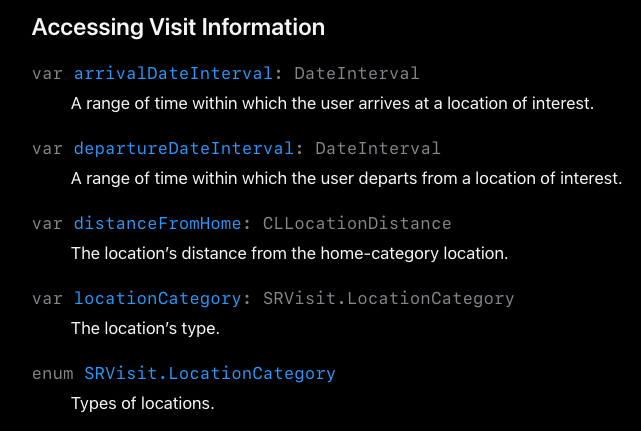

```
visits_gym_elapsedTime
visits_gym_startTime
visits_gym_distance
visits_home_elapsedTime
visits_home_startTime
visits_home_distance
visits_school_startTime
visits_school_elapsedTime
visits_school_distance
visits_unknown_startTime
visits_unknown_elapsedTime
visits_unknown_distance
visits_work_startTime
visits_work_elapsedTime
visits_work_distance
```

### Process

In [175]:
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []

In [176]:
days = [i for i in os.listdir(path ) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path  + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-visits':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start']) # using the start time
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:01<00:00, 29.99it/s]


In [177]:
visits_gym_endTime = [np.nan] * sample_count
visits_gym_startTime = [np.nan] * sample_count
visits_gym_elapsed = [np.nan] * sample_count
visits_gym_distance = [np.nan] * sample_count
visits_home_endTime = [np.nan] * sample_count
visits_home_startTime = [np.nan] * sample_count
visits_home_elapsed = [np.nan] * sample_count
visits_home_distance = [np.nan] * sample_count
visits_school_startTime = [np.nan] * sample_count
visits_school_endTime = [np.nan] * sample_count
visits_school_elapsed = [np.nan] * sample_count
visits_school_distance = [np.nan] * sample_count
visits_unknown_startTime = [np.nan] * sample_count
visits_unknown_endTime = [np.nan] * sample_count
visits_unknown_elapsed = [np.nan] * sample_count
visits_unknown_distance = [np.nan] * sample_count
visits_work_startTime = [np.nan] * sample_count
visits_work_endTime = [np.nan] * sample_count
visits_work_elapsed = [np.nan] * sample_count
visits_work_distance = [np.nan] * sample_count

In [178]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-visits':
            participants = [i for i in os.listdir(path + day+ '/' + sensor + '/iPhone') if not i.startswith('.')] # trying to avoid .DS files
            participants.sort()
            for participant in participants:
                devices = [i for i in os.listdir(path +day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path +day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path +day+ '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    
                                    for i in range(len(data['samples'])):

                                        if data['samples'][i]['sample']['locationCategory'] == 'Gym':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_gym_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_gym_startTime[sample_count] = start
                                            visits_gym_endTime[sample_count] = end
                                            visits_gym_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'Home':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_home_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_home_startTime[sample_count] = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            visits_home_endTime[sample_count] = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_home_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'School':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_school_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_school_startTime[sample_count] = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            visits_school_endTime[sample_count] = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_school_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'Unknown':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_unknown_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_unknown_startTime[sample_count] = start
                                            visits_unknown_endTime[sample_count] = end
                                            visits_unknown_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'Work':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_work_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_work_startTime[sample_count] = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            visits_work_endTime[sample_count] = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_work_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']
                                        
                                        sample_count+=1    

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:02<00:00, 26.45it/s]


In [247]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,

    'visits_gym_startTime': visits_gym_startTime,
    'visits_gym_endTime': visits_gym_endTime,
    'visits_gym_elapsed': visits_gym_elapsed,
    'visits_gym_distance': visits_gym_distance,
    'visits_home_startTime': visits_home_startTime,
    'visits_home_endTime': visits_home_endTime,    
    'visits_home_elapsed': visits_home_elapsed,
    'visits_home_distance': visits_home_distance,
    'visits_school_startTime': visits_school_startTime,
    'visits_school_endTime': visits_school_endTime,
    'visits_school_elapsed': visits_school_elapsed,
    'visits_school_distance': visits_school_distance,
    'visits_unknown_startTime': visits_unknown_startTime,
    'visits_unknown_endTime': visits_unknown_endTime,
    'visits_unknown_elapsed': visits_unknown_elapsed,
    'visits_unknown_distance': visits_unknown_distance,
    'visits_work_startTime': visits_work_startTime,
    'visits_work_endTime': visits_work_endTime,
    'visits_work_elapsed': visits_work_elapsed,
    'visits_work_distance': visits_work_distance
}

In [281]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,visits_gym_startTime,visits_gym_endTime,visits_gym_elapsed,visits_gym_distance,visits_home_startTime,visits_home_endTime,...,visits_school_elapsed,visits_school_distance,visits_unknown_startTime,visits_unknown_endTime,visits_unknown_elapsed,visits_unknown_distance,visits_work_startTime,visits_work_endTime,visits_work_elapsed,visits_work_distance
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03 18:30:00-05:00,2023-02-03,18:30:00,NaN,NaN,NaN,NaN,2023-02-03 18:30:00-05:00,2023-02-05 11:30:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03 18:30:00-05:00,2023-02-03,18:30:00,NaN,NaN,NaN,NaN,2023-02-03 18:30:00-05:00,2023-02-05 11:30:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 07:45:00-05:00,2023-02-06,07:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 07:45:00-05:00,2023-02-06 18:00:00-05:00,10.25,10827.529007


In [282]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

8768

In [283]:
rows_pre = df.shape[0]

# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last').reset_index(drop=True)
# df = df[~df.duplicated(keep='last')]

rows_post = df.shape[0]
rows_removed = rows_pre - rows_post
# Log cleaning
print(f'Deleting duplicate rows (keeping last) removed {rows_removed} rows, or {rows_removed/rows_pre:.1f}%')
logging.info(f'Deleting duplicate rows (keeping last) removed {rows_removed} rows, or {rows_removed/rows_pre:.1f}%')

Deleting duplicate rows (keeping last) removed 8768 rows, or 0.4%


In [299]:
(df.loc[3,'visits_home_endTime'] - df.loc[3,'visits_home_startTime'])

19.25

In [310]:
df.loc[3,'visits_home_startTime']

datetime.datetime(2023, 2, 5, 12, 0, tzinfo=tzoffset(None, -18000))

In [305]:
(df.loc[3,'visits_home_endTime'].date() - df.loc[3,'visits_home_startTime'].date()).days

for i in df.shape[0]:
    for 
    (df.loc[3,'visits_home_endTime'].date() - df.loc[3,'visits_home_startTime'].date()).days
    # Check if start and end are on different days
    if date_dif != 0:
        for i in range date_dif:
            df.loc[len(df)] = df.loc

1

In [319]:
x = df.loc[0, start_col]
y = df.loc[0, end_col]

In [324]:
np.isnan(x)

zsh:1: no matches found: np.isnan(x)


In [326]:
start_time = parse_time(row[start_col])
end_time = parse_time(row[end_col])

# If both times are not null and they are on different days
if start_time and end_time:
    print('yes')

In [331]:
df.loc[3, 'trial_date'] + timedelta(days=1)

datetime.date(2023, 2, 6)

In [332]:
from datetime import datetime, timedelta

def parse_time(t):
    return t if pd.notnull(t) else None

# Step 1: Identify all pairs of columns that end with 'startTime' and 'endTime'
time_columns = [col for col in df.columns if 'Time' in col]
start_time_columns = [col for col in time_columns if 'start' in col]
end_time_columns = [col for col in time_columns if 'end' in col]

# Step 2: Create a new dataframe to hold the results
new_rows = []

# Loop through each row to check for differences in days and create new rows if needed
for index, row in df.iterrows():
    # For each pair of start and end time columns
    for start_col, end_col in zip(start_time_columns, end_time_columns):
        start_time = parse_time(row[start_col])
        end_time = parse_time(row[end_col])
        
        # If both times are not null and they are on different days
        if start_time and end_time and (end_time.date() > start_time.date()):
            # Calculate the number of days between the two times
            days_diff = (end_time.date() - start_time.date()).days
            
            # Step 3: For each day difference, create a duplicate row with adjusted trial_date
            for n in range(1, days_diff + 1):
                new_row = row.copy()
                new_row['trial_date'] = row['trial_date'] + timedelta(days=n)
                #new_row['trial_date'] = new_trial_date.date().isoformat()
                new_rows.append(new_row)

# Convert the list of Series objects into a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Check if we have any new rows to add
if not new_rows_df.empty:
    # Step 4: Append the new rows to the original dataframe
    df = pd.concat([df, new_rows_df], ignore_index=True)

,ParticipantIdentifier,date_time,trial_date,time,visits_gym_startTime,visits_gym_endTime,visits_gym_elapsed,visits_gym_distance,visits_home_startTime,visits_home_endTime,...,visits_school_elapsed,visits_school_distance,visits_unknown_startTime,visits_unknown_endTime,visits_unknown_elapsed,visits_unknown_distance,visits_work_startTime,visits_work_endTime,visits_work_elapsed,visits_work_distance
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 07:45:00-05:00,2023-02-06,07:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 07:45:00-05:00,2023-02-06 18:00:00-05:00,10.25,10827.529007
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-07 08:00:00-05:00,2023-02-07,08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-07 08:00:00-05:00,2023-02-07 18:00:00-05:00,10.00,10827.529007
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05 11:45:00-05:00,2023-02-05,11:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023-02-05 11:45:00-05:00,2023-02-05 11:45:00-05:00,0.0,470.776053,NaN,NaN,NaN,NaN
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05 12:00:00-05:00,2023-02-05,12:00:00,NaN,NaN,NaN,NaN,2023-02-05 12:00:00-05:00,2023-02-06 07:15:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 07:45:00-05:00,2023-02-16,07:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-16 07:45:00-05:00,2023-02-16 18:15:00-05:00,10.50,10840.535763


In [307]:
df.to_csv('visits.csv', index=False)

In [ ]:
# First, we identify all the pairs of 'startTime' and 'endTime' columns
start_time_columns = [col for col in df.columns if col.endswith('startTime')]
end_time_columns = [col for col in df.columns if col.endswith('endTime')]

# Now we create a list of tuples pairing each 'startTime' with its 'endTime'
time_pairs = list(zip(start_time_columns, end_time_columns))

# Convert the 'startTime' and 'endTime' to datetime objects and compare
def check_same_day(row):
    for start_col, end_col in time_pairs:
        # Only proceed if both start and end times are not NaN
        if not pd.isna(row[start_col]) and not pd.isna(row[end_col]):
            start_time = pd.to_datetime(row[start_col])
            end_time = pd.to_datetime(row[end_col])
            # Check if the dates are different
            if start_time.date() != end_time.date():
                # how many days difference?
                date_dif = (end_time.date() - start_time.date()).days
                for day in range(date_dif):
                    
                return True
    return False

# Apply the check to each row
df['different_day'] = df.apply(check_same_day, axis=1)

,ParticipantIdentifier,trial_date,visits_gym_endTime,visits_home_endTime,visits_school_endTime,visits_unknown_endTime,visits_work_endTime


In [ ]:
elapsed_cols = [col for col in df.columns if 'elapsed' in col]

for row in df.shape[0]:
    for column in elapsed_cols:
        if 

### Test Single Subject

#### Run 1

In [147]:
# test if correct
ID = '1b9b62f1-095b-4819-92a0-ea8e7abee884'
date = datetime.date(2022, 10, 14)

In [148]:
x = df.loc[(df.ParticipantIdentifier==ID)].reset_index(drop=True)

In [ ]:
x

#### Run 2

In [298]:
# test if correct
ID = '0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd'
date = datetime.date(2023, 3, 4)

In [299]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [305]:
x

,ParticipantIdentifier,date_time,trial_date,time,visits_gym_startTime,visits_gym_endTime,visits_gym_elapsed,visits_gym_distance,visits_home_startTime,visits_home_endTime,...,visits_school_elapsed,visits_school_distance,visits_unknown_startTime,visits_unknown_endTime,visits_unknown_elapsed,visits_unknown_distance,visits_work_startTime,visits_work_endTime,visits_work_elapsed,visits_work_distance
0,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-04 18:45:00-05:00,2023-03-04,18:45:00,NaN,NaN,NaN,NaN,2023-03-04 18:45:00-05:00,2023-03-06 15:15:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-04 17:00:00-05:00,2023-03-04,17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023-03-04 17:00:00-05:00,2023-03-04 18:15:00-05:00,1.25,2783.801655,NaN,NaN,NaN,NaN
2,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-04 18:30:00-05:00,2023-03-04,18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023-03-04 18:30:00-05:00,2023-03-04 18:30:00-05:00,0.00,3351.244949,NaN,NaN,NaN,NaN
3,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-04 18:45:00-05:00,2023-03-04,18:45:00,NaN,NaN,NaN,NaN,2023-03-04 18:45:00-05:00,2023-03-06 15:15:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-04 18:45:00-05:00,2023-03-04,18:45:00,NaN,NaN,NaN,NaN,2023-03-04 18:45:00-05:00,2023-03-06 15:15:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

In [208]:
efa_cols = [col for col in df.columns if not col.endswith('Time')]

In [210]:
profile = ProfileReport(df[efa_cols].iloc[:,4:], title=f"SK Visits Run {run_num} | Pandas Profiling Report", explorative=True)
profile.to_file(eda_reports_path + f"passive_sk_visits_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

If elapsed time = 0, then set to 7.5 minutes as we are dealing in 15 minute intervals.

### Save

In [308]:
# save to csv
# test if run 2
if df.date_time.min().date() > datetime.date(2022,10,1):
    df.to_csv('../3_3_2_processed_data/run_2/run2_sk_visits.csv', index=False)
# test if run 1
elif df.date_time.min().date() < datetime.date(2022,10,1):
    df.to_csv('../3_3_2_processed_data/run_1/run1_sk_visits.csv', index=False)

## Telephony

### Process

In [309]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

In [310]:
days = [i for i in os.listdir(path + 'app_data/') if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + 'app_data/' + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-speech-telephony':
            participants = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+ 'app_data/'+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path+ 'app_data/' + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [08:30<00:00,  9.28s/it]  


In [311]:
speakingRate = [np.nan] * sample_count
averagePauseDuration = [np.nan] * sample_count
voiceAnalytics_jitter = [[] for _ in range(sample_count)]
voiceAnalytics_shimmer = [[] for _ in range(sample_count)]
voiceAnalytics_pitch = [[] for _ in range(sample_count)]
voiceAnalytics_voicing = [[] for _ in range(sample_count)]
speechDuration = [np.nan] * sample_count

In [312]:
days = [i for i in os.listdir(path + 'app_data/') if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + 'app_data/' + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-speech-telephony':
            participants = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants:
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+ 'app_data/'+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path+ 'app_data/' + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        speakingRate[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['speakingRate']
                                        averagePauseDuration[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['averagePauseDuration']
                                        speechDuration[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['speechDuration']
                                        # if data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics'] != None:
                                        #     voiceAnalytics_jitter[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['jitter']['acousticFeatureValuePerFrame']
                                        #     voiceAnalytics_shimmer[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['shimmer']['acousticFeatureValuePerFrame']
                                        #     voiceAnalytics_pitch[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['pitch']['acousticFeatureValuePerFrame']
                                        #     voiceAnalytics_voicing[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['voicing']['acousticFeatureValuePerFrame']

                                        sample_count+=1

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [07:05<00:00,  7.74s/it]  


In [313]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,

    'speakingRate': speakingRate,
    'averagePauseDuration': averagePauseDuration,
    'speechDuration': speechDuration,
    # 'voiceAnalytics_jitter': voiceAnalytics_jitter,
    # 'voiceAnalytics_shimmer': voiceAnalytics_shimmer,
    # 'voiceAnalytics_pitch': voiceAnalytics_pitch,
    # 'voiceAnalytics_voicing': voiceAnalytics_voicing
}

In [314]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,speakingRate,averagePauseDuration,speechDuration
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,114.649682,0.369143,18.84
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,119.354839,0.345000,18.60
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,102.564103,0.390000,1.24


In [315]:
df.shape

(803573, 7)

### Test Single Subject

#### Run 1

In [35]:
# test if correct
ID = '1b9b62f1-095b-4819-92a0-ea8e7abee884'
date = datetime.date(2022, 10, 17)

In [36]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [39]:
x.sort_values(by='time').head()

,ParticipantIdentifier,date_time,trial_date,time,speakingRate,averagePauseDuration,speechDuration,voiceAnalytics_jitter,voiceAnalytics_shimmer,voiceAnalytics_pitch,voiceAnalytics_voicing
4,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-17 16:35:18-04:00,2022-10-17,16:35:18,84.507042,-1.000000,0.71,"[5.571229457855225, 4.705389022827148, 4.51640...","[1.2368234598268155, 1.2368234598268155, 1.236...","[-0.14975832402706146, -0.06895042210817337, -...","[0.08039538562297821, 0.06917519122362137, 0.0..."
5,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-17 16:35:18-04:00,2022-10-17,16:35:18,279.069767,0.256667,0.86,"[1.9931166172027588, 1.7396711111068726, 1.864...","[0.4291691060311751, 0.4291691060311751, 0.683...","[-0.024763373658061028, 0.059534069150686264, ...","[0.5016994476318359, 0.6099139451980591, 0.634..."
6,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-17 16:35:18-04:00,2022-10-17,16:35:18,130.434783,0.630000,0.92,"[2.240852117538452, 2.2581748962402344, 0.7434...","[0.37053955102411384, 0.37053955102411384, 0.3...","[-0.004133672919124365, 0.07686292380094528, 0...","[0.05738174915313721, 0.051964662969112396, 0...."
7,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-17 16:35:18-04:00,2022-10-17,16:35:18,217.821782,0.247000,3.03,"[1.5131726264953613, 2.8168046474456787, 2.687...","[0.8687296471316917, 0.8687296471316917, 1.056...","[-0.047300826758146286, -0.15642088651657104, ...","[0.05021912604570389, 0.06224745512008667, 0.0..."
8,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-17 16:35:18-04:00,2022-10-17,16:35:18,82.457559,0.228125,12.37,"[1.7421506643295288, 3.4636895656585693, 4.548...","[0.24775585503168157, 0.24775585503168157, 0.3...","[0.10813695192337036, 0.13497294485569, 0.0194...","[0.09366519749164581, 0.11247751861810684, 0.1..."


#### Run 2

In [319]:
# test if correct
ID = '0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd'
date = datetime.date(2023, 3, 6)

In [320]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [321]:
x

,ParticipantIdentifier,date_time,trial_date,time,speakingRate,averagePauseDuration,speechDuration
0,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 08:32:06-05:00,2023-03-06,08:32:06,54.794521,0.630000,2.19
1,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 08:32:06-05:00,2023-03-06,08:32:06,196.721311,0.252000,1.83
2,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 08:32:06-05:00,2023-03-06,08:32:06,62.500000,0.513333,3.84
3,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 08:32:06-05:00,2023-03-06,08:32:06,54.794521,0.630000,2.19
4,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 08:32:06-05:00,2023-03-06,08:32:06,196.721311,0.252000,1.83
5,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 08:32:06-05:00,2023-03-06,08:32:06,62.500000,0.513333,3.84


### Save

In [322]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated(subset=['ParticipantIdentifier', 'date_time',
                      'time', 'speakingRate', 'averagePauseDuration',
                      'speechDuration'
                      ]).sum()

29357

In [323]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(subset=['ParticipantIdentifier', 'date_time',
                      'time', 'speakingRate', 'averagePauseDuration',
                      'speechDuration'],
                      keep='last')

In [324]:
# save to csv
# test if run 2
if df.date_time.min().date() > datetime.date(2022,10,1):
    df.to_csv('../3_3_2_processed_data/run_2/run2_sk_telephony_small.csv', index=False)
# test if run 1
elif df.date_time.min().date() < datetime.date(2022,10,1):
    df.to_csv('../3_3_2_processed_data/run_1/run1_sk_telephony_small.csv', index=False)

## Messages

### Process

In [325]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

In [326]:
days = [i for i in os.listdir(path + 'app_data/') if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + 'app_data/' + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-messages-usage':
            participants = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+ 'app_data/'+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path+ 'app_data/' + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())
                                        duration.append(data['samples'][i]['sample']['duration'])

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:09<00:00,  5.84it/s]


In [327]:
messages_incoming = [np.nan] * sample_count
messages_outgoing = [np.nan] * sample_count
messages_uniqueContacts = [np.nan] * sample_count
calls_incoming = [np.nan] * sample_count
calls_outgoing = [np.nan] * sample_count
calls_duration = [np.nan] * sample_count
calls_uniqueContacts = [np.nan] * sample_count

In [328]:
days = [i for i in os.listdir(path + 'app_data/') if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + 'app_data/' + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-messages-usage':
            participants = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+ 'app_data/'+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+ 'app_data/'+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path+ 'app_data/' + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        # check if phone (vs message)
                                        if 'totalIncomingCalls' in data['samples'][i]['sample']:
                                            calls_incoming[sample_count] = data['samples'][i]['sample']['totalIncomingCalls']
                                            calls_outgoing[sample_count] = data['samples'][i]['sample']['totalOutgoingCalls']
                                            calls_duration[sample_count] = data['samples'][i]['sample']['totalPhoneCallDuration']
                                            calls_uniqueContacts[sample_count] = data['samples'][i]['sample']['totalUniqueContacts']
                                        else:
                                            messages_incoming[sample_count] = data['samples'][i]['sample']['totalIncomingMessages']
                                            messages_outgoing[sample_count] = data['samples'][i]['sample']['totalOutgoingMessages']
                                            messages_uniqueContacts[sample_count] = data['samples'][i]['sample']['totalUniqueContacts']

                                        sample_count+=1

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:01<00:00, 38.64it/s]


In [329]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,
    'messageCall_timespan': duration,

    'messages_incoming': messages_incoming,
    'messages_outgoing': messages_outgoing,
    'messages_uniqueContacts': messages_uniqueContacts,
    'calls_incoming': calls_incoming,
    'calls_outgoing': calls_outgoing,
    'calls_duration': calls_duration,
    'calls_uniqueContacts': calls_uniqueContacts
}

In [330]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,messageCall_timespan,messages_incoming,messages_outgoing,messages_uniqueContacts,calls_incoming,calls_outgoing,calls_duration,calls_uniqueContacts
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02 18:00:00-05:00,2023-02-02,18:00:00,1800,1.0,0.0,1.0,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-03 00:00:00-05:00,2023-03-02,00:00:00,86400,NaN,NaN,NaN,2.0,1.0,467.341473,1.0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 18:00:00-05:00,2023-02-16,18:00:00,1800,1.0,0.0,1.0,NaN,NaN,NaN,NaN


### Test Single Subject

#### Run 1

In [95]:
# test if correct
ID = '1b9b62f1-095b-4819-92a0-ea8e7abee884'
date = datetime.date(2022, 10, 15)

In [96]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [97]:
x

,ParticipantIdentifier,date_time,trial_date,time,duration,messages_incoming,messages_outgoing,messages_uniqueContacts,calls_incoming,calls_outgoing,calls_duration,calls_uniqueContacts
0,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-15 16:00:00-04:00,2022-10-15,16:00:00,1800,0.0,3.0,1.0,NaN,NaN,NaN,NaN
1,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-15 16:00:00-04:00,2022-10-15,16:00:00,1800,0.0,3.0,1.0,NaN,NaN,NaN,NaN
2,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-15 16:00:00-04:00,2022-10-15,16:00:00,1800,0.0,3.0,1.0,NaN,NaN,NaN,NaN
3,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-16 00:00:00-04:00,2022-10-15,00:00:00,86400,NaN,NaN,NaN,1.0,2.0,190.498939,2.0
4,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-15 16:00:00-04:00,2022-10-15,16:00:00,1800,0.0,3.0,1.0,NaN,NaN,NaN,NaN
5,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-16 00:00:00-04:00,2022-10-15,00:00:00,86400,NaN,NaN,NaN,1.0,2.0,190.498939,2.0
6,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-16 00:00:00-04:00,2022-10-15,00:00:00,86400,NaN,NaN,NaN,1.0,2.0,190.498939,2.0
7,1b9b62f1-095b-4819-92a0-ea8e7abee884,2022-10-16 00:00:00-04:00,2022-10-15,00:00:00,86400,NaN,NaN,NaN,1.0,2.0,190.498939,2.0


#### Run 2

In [341]:
# test if correct
ID = '0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd'
date = datetime.date(2023, 3, 6)

In [346]:
x = df.loc[(df.ParticipantIdentifier==ID) & (df.trial_date == date)].reset_index(drop=True)

In [347]:
x

,ParticipantIdentifier,date_time,trial_date,time,messageCall_timespan,messages_incoming,messages_outgoing,messages_uniqueContacts,calls_incoming,calls_outgoing,calls_duration,calls_uniqueContacts
0,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-06 23:30:00-05:00,2023-03-06,23:30:00,1800,1.0,0.0,1.0,NaN,NaN,NaN,NaN
1,0a06ff99-9b73-4f6a-8b36-cdf27b4c22fd,2023-03-07 00:00:00-05:00,2023-03-06,00:00:00,86400,NaN,NaN,NaN,2.0,2.0,684.026914,1.0


### Save

In [344]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

8284

In [345]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last')

In [348]:
# save to csv
# test if run 2
if df.date_time.min().date() > datetime.date(2022,10,1):
    df.to_csv('../3_3_2_processed_data/run_2/run2_sk_messagesCalls.csv', index=False)
# test if run 1
elif df.date_time.min().date() < datetime.date(2022,10,1):
    df.to_csv('../3_3_2_processed_data/run_1/run1_sk_messagesCalls.csv', index=False)

# Survey Results

In [1494]:
#Create a DataFrame object
df = pd.DataFrame(
    columns = [
        'ParticipantIdentifier', 
        'ResultIdentifier',
        'Answers'
    ]
)

In [1495]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
for day in tqdm(days):
    files = os.listdir(path + day)
    results = [i for i in files if i.startswith('SurveyQuestionResults')]
    for result in results:
        filepath = path+day+ '/' + result
        temp_df = pd.read_csv(filepath)
        
        df = pd.concat([df, temp_df], ignore_index=True)


# add trial day column 
df = df.dropna(subset=['EndDate']) # drop any NAs
df = df.reset_index(drop=True)
df['trial_date'] = None        

for i in range(df.shape[0]):
    dt = parser.parse(df.EndDate[i])
    df.loc[i, 'trial_date'] = (dt + datetime.timedelta(hours = -4)).date() # trial day associated with sample (4am is when the day flips)

# save to csv
df.to_csv('../3_3_2_processed_data/run1_survey_results.csv', index=False)

100%|██████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


# Aggregate

## Device Usage

### Unlocks

In [1426]:
df = pd.read_csv('../3_3_2_processed_data/run1_sk_deviceUsage.csv')

In [1477]:
df

,Unnamed: 0,ParticipantIdentifier,datetime,trial_date,time,duration,total_unlocks,total_unlock_duration,app_usage_books,app_usage_business,...,web_usage_reference,web_usage_shopping,web_usage_social_networking,web_usage_sports,web_usage_stickers,web_usage_travel,web_usage_utilities,web_usage_weather,app_usage_social_network,web_usage_utilities_miscellaneous
0,0,5e509967-0d3b-4fe1-a275-231ba42473d5,2022-10-09 05:00:00-04:00,2022-10-09,05:00:00,900,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5e509967-0d3b-4fe1-a275-231ba42473d5,2022-10-09 05:15:00-04:00,2022-10-09,05:15:00,900,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5e509967-0d3b-4fe1-a275-231ba42473d5,2022-10-09 05:30:00-04:00,2022-10-09,05:30:00,900,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5e509967-0d3b-4fe1-a275-231ba42473d5,2022-10-09 05:45:00-04:00,2022-10-09,05:45:00,900,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5e509967-0d3b-4fe1-a275-231ba42473d5,2022-10-09 06:00:00-04:00,2022-10-09,06:00:00,900,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131059,131059,92863208-10a4-443b-a225-18630552f5cc,2022-10-15 01:00:00-04:00,2022-10-14,01:00:00,900,0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
131060,131060,92863208-10a4-443b-a225-18630552f5cc,2022-10-15 01:15:00-04:00,2022-10-14,01:15:00,900,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131061,131061,92863208-10a4-443b-a225-18630552f5cc,2022-10-15 01:30:00-04:00,2022-10-14,01:30:00,900,3,226.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131062,131062,92863208-10a4-443b-a225-18630552f5cc,2022-10-15 01:45:00-04:00,2022-10-14,01:45:00,900,3,223.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1478]:
subs = np.random.choice(np.unique(df.ParticipantIdentifier), 10)

In [1479]:
plot = df[df['ParticipantIdentifier'].isin(subs)]

In [1480]:
x = plot.groupby(['ParticipantIdentifier', 'trial_date'])['total_unlocks'].sum().reset_index(name = 'total_unlocks')

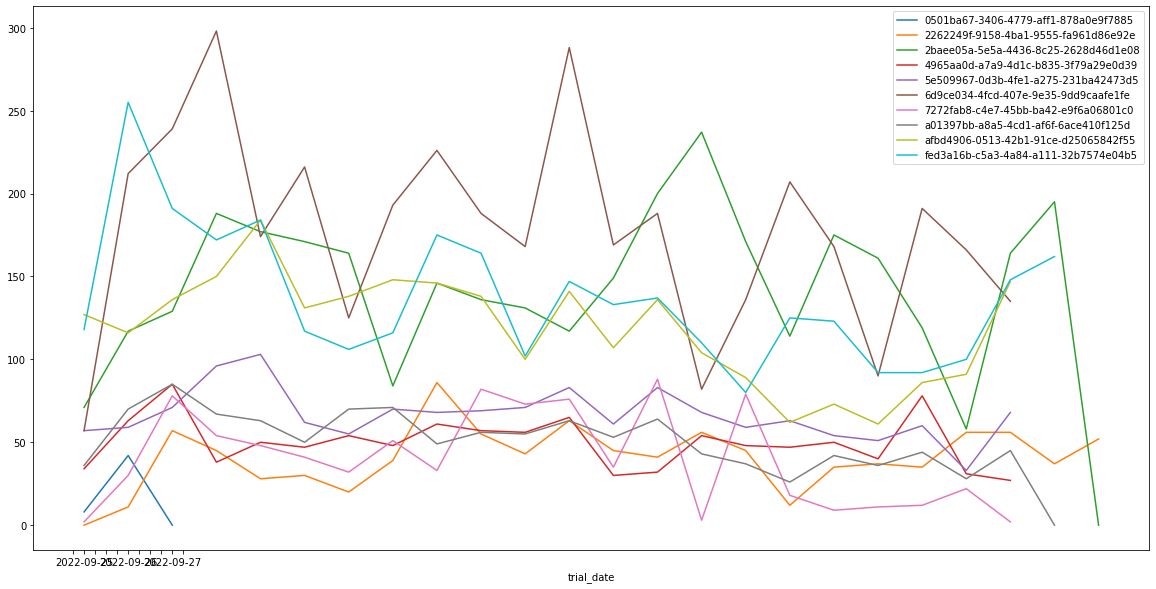

In [1481]:
x.set_index('trial_date', inplace = True)
x.groupby('ParticipantIdentifier')['total_unlocks'].plot(legend=True, figsize=(20, 10));

In [1482]:
x = plot.groupby(['ParticipantIdentifier', 'trial_date'])['total_unlock_duration'].sum().reset_index(name = 'unlock_duration')
x.unlock_duration = x.unlock_duration/3600

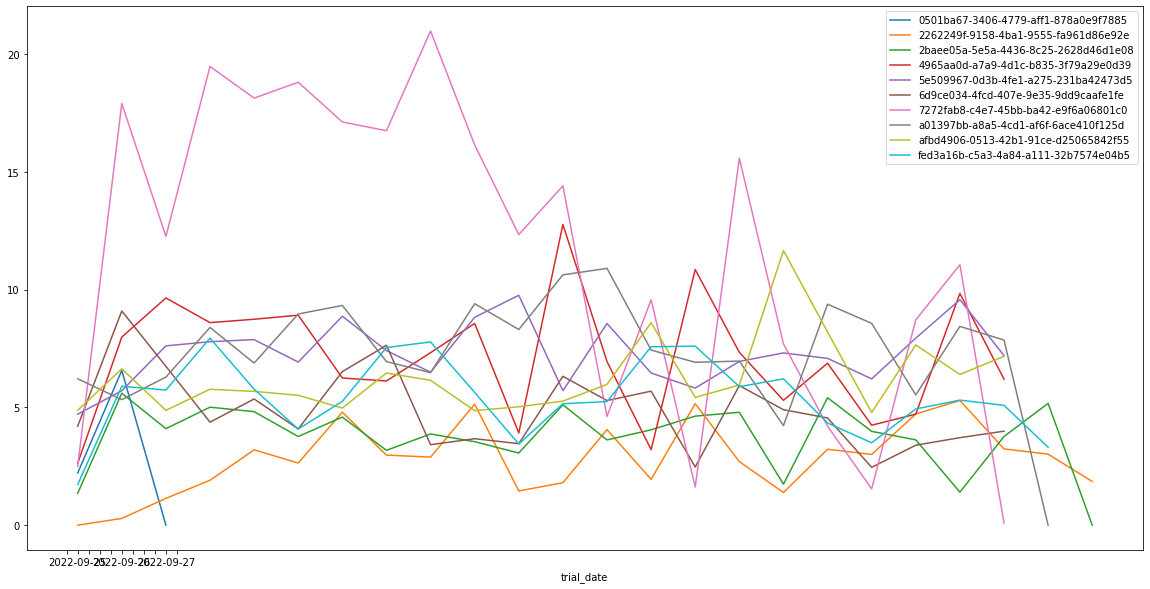

In [1483]:
x.set_index('trial_date', inplace = True)
x.groupby('ParticipantIdentifier')['unlock_duration'].plot(legend=True, figsize=(20, 10));

### Social Media

In [1473]:
df = pd.read_csv('../3_3_2_processed_data/run1_sk_deviceUsage.csv')

In [1476]:
df.app_usage_photo_and_video.describe()

count    29127.000000
mean       304.258729
std        316.588070
min          0.000000
25%         49.000000
50%        167.000000
75%        502.500000
max       1800.000000
Name: app_usage_photo_and_video, dtype: float64

In [1456]:
social = df.groupby(['ParticipantIdentifier', 'trial_date'])['web_usage_social_networking'].sum().reset_index(name = 'social_time')

In [1455]:
x.social_time.describe()

count     1459.000000
mean        74.409184
std        548.996883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      10486.000000
Name: social_time, dtype: float64

In [1461]:
social = df.groupby(['ParticipantIdentifier', 'trial_date'])['app_usage_social_network'].sum().reset_index(name = 'social_time')

In [1462]:
social = df.groupby(['ParticipantIdentifier', 'trial_date']).agg(
    social_time_app = ('app_usage_social_network','sum'),
    social_time_web = ('web_usage_social_networking','sum'),
).reset_index()

In [1463]:
social['social_time'] = social.social_time_app + social.social_time_web

In [1464]:
df = pd.read_csv('../3_3_2_processed_data/run1_survey_results.csv')

In [1465]:
affect_df = df.loc[df.ResultIdentifier.str.startswith('affect'), ['ParticipantIdentifier', 'ResultIdentifier', 'Answers', 'trial_date']]

In [1466]:
affect_df = affect_df[~affect_df.ResultIdentifier.str.endswith('_am')].reset_index(drop=True)

In [1467]:
cor_df = social.merge(affect_df, how='left', on=['ParticipantIdentifier', 'trial_date'])

In [1468]:
cor_df.head()

,ParticipantIdentifier,trial_date,social_time_app,social_time_web,social_time,ResultIdentifier,Answers
0,01801252-3a7e-4f5f-8b6d-49e8da3902f3,2022-09-29,100.0,0.0,100.0,NaN,NaN
1,01801252-3a7e-4f5f-8b6d-49e8da3902f3,2022-09-30,652.0,0.0,652.0,affect_neg_frustrated,3
2,01801252-3a7e-4f5f-8b6d-49e8da3902f3,2022-09-30,652.0,0.0,652.0,affect_pos_relaxedCalm,2
3,01801252-3a7e-4f5f-8b6d-49e8da3902f3,2022-09-30,652.0,0.0,652.0,affect_neg_ashamed,1
4,01801252-3a7e-4f5f-8b6d-49e8da3902f3,2022-09-30,652.0,0.0,652.0,affect_pos_excited,4


In [1469]:
cor_df.Answers = pd.to_numeric(cor_df.Answers)

In [1470]:
print(f'Max: {round(cor_df.social_time.max()/3600,2)} hours')

Max: 10.96 hours


In [1471]:
cor_df.social_time.describe()

count    21298.000000
mean      1178.048831
std       2682.901360
min          0.000000
25%         18.000000
50%        284.000000
75%       1172.000000
max      39461.000000
Name: social_time, dtype: float64

In [1472]:
# Stress and Words typed
data = cor_df.loc[cor_df.ResultIdentifier=='affect_neg_stressed']

md = smf.mixedlm("Answers ~ social_time", data, groups=data["ParticipantIdentifier"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Answers   
No. Observations: 1044    Method:             REML      
No. Groups:       65      Scale:              1.0146    
Min. group size:  2       Log-Likelihood:     -1571.0953
Max. group size:  22      Converged:          Yes       
Mean group size:  16.1                                  
--------------------------------------------------------
               Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      3.316    0.102 32.664 0.000  3.117  3.515
social_time    0.000    0.000  1.334 0.182 -0.000  0.000
Group Var      0.564    0.118                           



## Keyboard

In [1705]:
df = pd.read_csv('../3_3_2_processed_data/run1_sk_keyboard.csv')

# select only subjects in run 1
df = df.loc[df.ParticipantIdentifier.isin(subjects)].reset_index(drop=True)

In [1643]:
# make df with delete ratio and word count by day
x = df.groupby(['ParticipantIdentifier', 'trial_date'])['keyboard_total_words'].sum().reset_index(name = 'word_count')
y = df.groupby(['ParticipantIdentifier', 'trial_date'])['keyboard_total_deletes'].sum().reset_index(name = 'delete_count')
x['ratio'] = y.delete_count / x.word_count
del_ratio = x.reset_index(drop=True)

In [1644]:
good_subs = del_ratio.groupby('ParticipantIdentifier').count().reset_index()
good_subs = good_subs.loc[good_subs.trial_date > 20].ParticipantIdentifier

In [1645]:
del_ratio_good = del_ratio.loc[del_ratio.ParticipantIdentifier.isin(good_subs)]

### Visualize

In [1646]:
df.set_index('trial_date', inplace=True)

In [1651]:
subs = np.random.choice(np.unique(df.ParticipantIdentifier), 10)

In [1652]:
plot = df[df['ParticipantIdentifier'].isin(subs)]

In [1653]:
x = plot.groupby(['ParticipantIdentifier', 'trial_date'])['keyboard_total_words'].sum().reset_index(name = 'word_count')

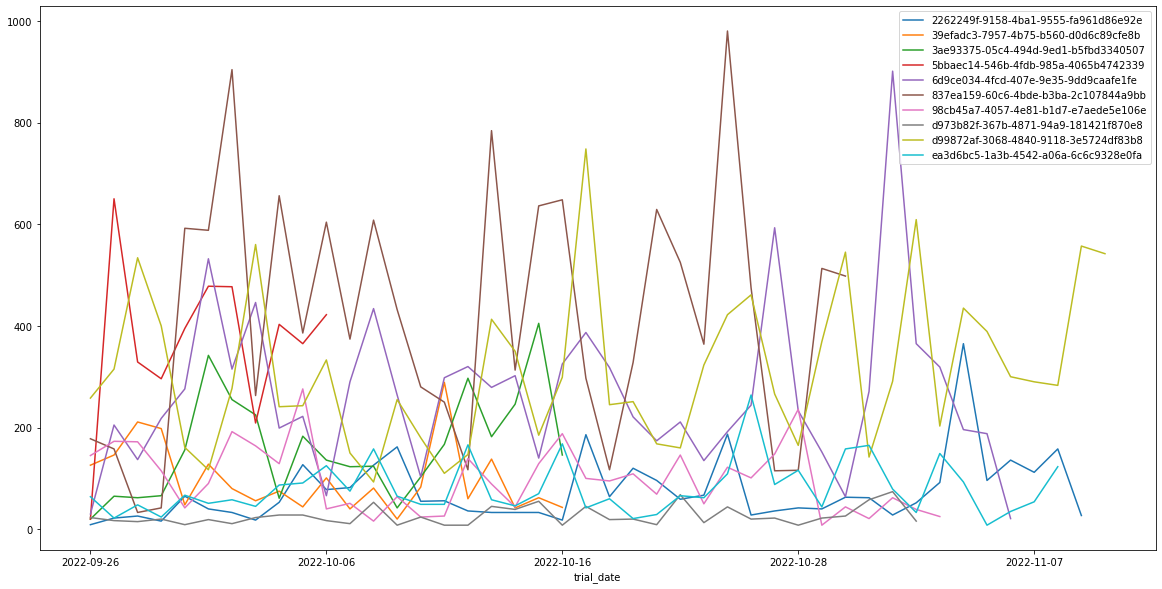

In [1654]:
x.set_index('trial_date', inplace = True)
x.groupby('ParticipantIdentifier')['word_count'].plot(legend=True, figsize=(20, 10));

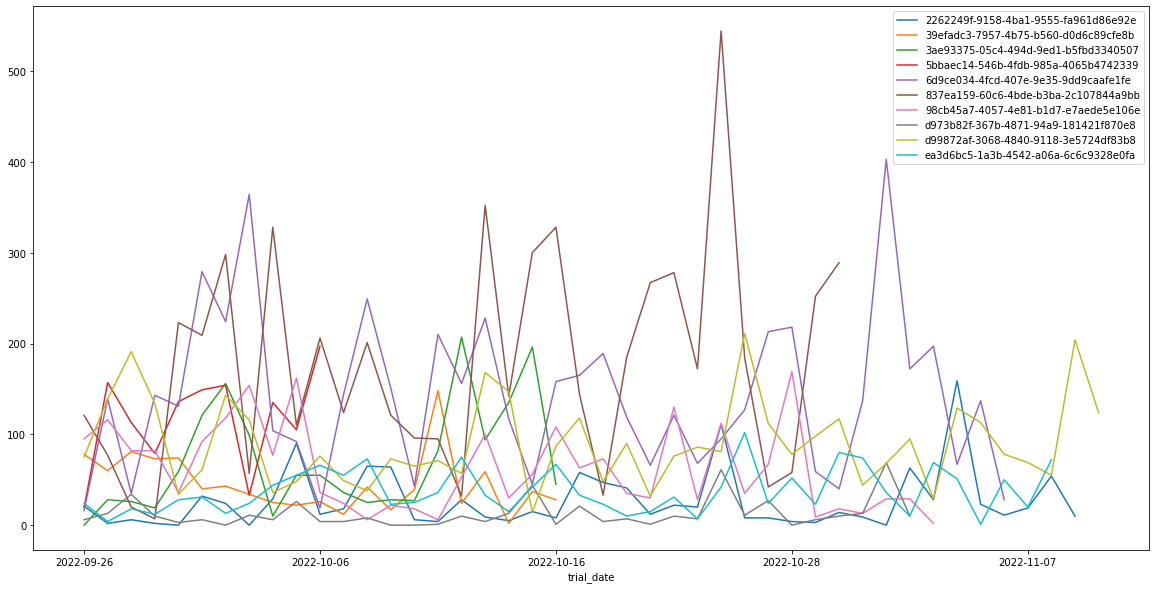

In [1655]:
y = plot.groupby(['ParticipantIdentifier', 'trial_date'])['keyboard_total_deletes'].sum().reset_index(name = 'delete_count')
y.set_index('trial_date', inplace = True)
y.groupby('ParticipantIdentifier')['delete_count'].plot(legend=True, figsize=(20, 10));

In [1656]:
x['ratio'] = y.delete_count / x.word_count

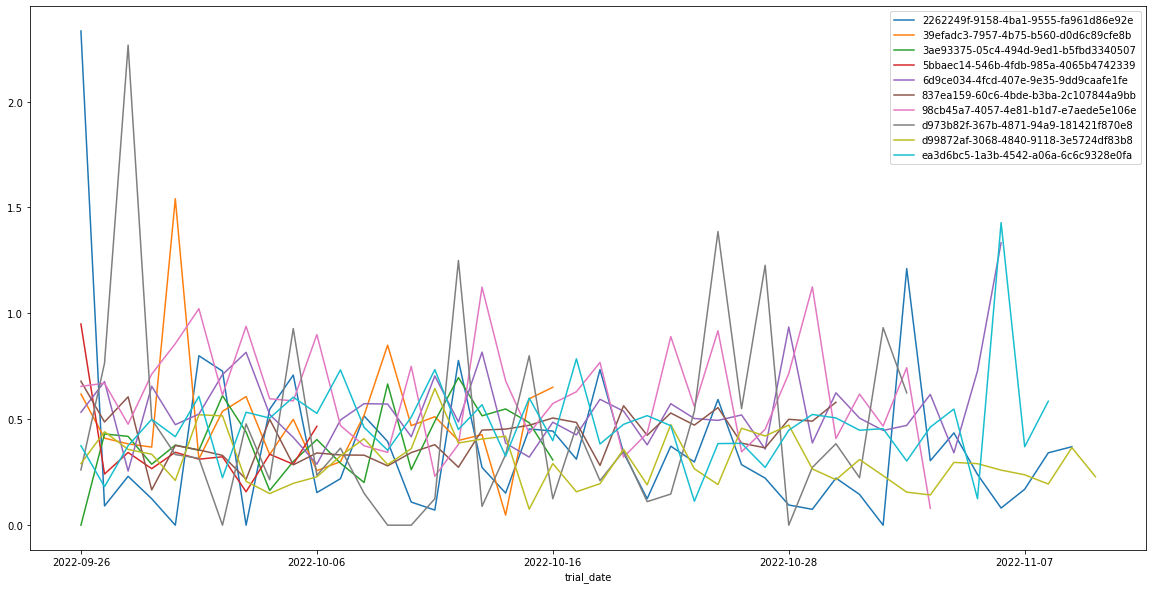

In [1657]:
x.groupby('ParticipantIdentifier')['ratio'].plot(legend=True, figsize=(20, 10));

In [1546]:
del_ratio = x.reset_index()

### Typing and Affect

Is a higher delete ratio correlated with higher stress?

In [1624]:
df = pd.read_csv('../3_3_2_processed_data/run1_survey_results.csv')

In [1625]:
df.shape

(390923, 8)

In [1626]:
affect_df = df.loc[df.ResultIdentifier.str.startswith('affect'), ['ParticipantIdentifier', 'ResultIdentifier', 'Answers', 'trial_date']]

In [1627]:
affect_df = affect_df[~affect_df.ResultIdentifier.str.endswith('_am')].reset_index(drop=True)

In [1634]:
affect_df.trial_date.max()

'2022-11-09'

In [1678]:
cor_df = del_ratio_good.merge(affect_df, how='left', on=['ParticipantIdentifier', 'trial_date'])

In [1679]:
cor_df.Answers = pd.to_numeric(cor_df.Answers)

In [1680]:
cor_df = cor_df.dropna(subset='ResultIdentifier').reset_index(drop = True)

In [1694]:
x = cor_df.groupby('ParticipantIdentifier').count().reset_index()

In [1698]:
subs20 = x.loc[x.trial_date> 20*20].ParticipantIdentifier

In [1700]:
cor_df = cor_df.loc[cor_df.ParticipantIdentifier.isin(subs20)]

In [1574]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1701]:
# Stress and Words typed
data = cor_df.loc[cor_df.ResultIdentifier=='affect_neg_stressed']

md = smf.mixedlm("word_count ~ Answers", data, groups=data["ParticipantIdentifier"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: word_count
No. Observations: 1442    Method:             REML      
No. Groups:       43      Scale:              18813.5280
Min. group size:  21      Log-Likelihood:     -9199.1700
Max. group size:  43      Converged:          Yes       
Mean group size:  33.5                                  
--------------------------------------------------------
            Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   156.948   19.308 8.128 0.000 119.104 194.792
Answers       5.416    3.426 1.581 0.114  -1.299  12.130
Group Var 10512.919   17.975                            



In [1702]:
# Stress and delete ratio
data = cor_df.loc[cor_df.ResultIdentifier=='affect_neg_stressed']

md = smf.mixedlm("ratio ~ Answers", data, groups=data["ParticipantIdentifier"])
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ratio  
No. Observations: 1442    Method:             REML   
No. Groups:       43      Scale:              0.0509 
Min. group size:  21      Log-Likelihood:     44.4730
Max. group size:  43      Converged:          Yes    
Mean group size:  33.5                               
-----------------------------------------------------
            Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.399    0.026 15.276 0.000  0.348  0.450
Answers     0.008    0.006  1.487 0.137 -0.003  0.019
Group Var   0.015    0.016                           



In [1703]:
# Happiness and words typed
data = cor_df.loc[cor_df.ResultIdentifier=='affect_pos_happy']

md = smf.mixedlm("word_count ~ Answers", data, groups=data["ParticipantIdentifier"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: word_count
No. Observations:  1442    Method:             REML      
No. Groups:        43      Scale:              18742.3308
Min. group size:   21      Log-Likelihood:     -9195.9650
Max. group size:   43      Converged:          Yes       
Mean group size:   33.5                                  
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   210.143   20.170 10.419 0.000 170.611 249.676
Answers     -11.882    4.054 -2.931 0.003 -19.828  -3.935
Group Var 10314.462   17.653                             



In [1704]:
# Happiness and ratio
data = cor_df.loc[cor_df.ResultIdentifier=='affect_pos_happy']

md = smf.mixedlm("ratio ~ Answers", data, groups=data["ParticipantIdentifier"])
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ratio  
No. Observations: 1442    Method:             REML   
No. Groups:       43      Scale:              0.0510 
Min. group size:  21      Log-Likelihood:     43.5500
Max. group size:  43      Converged:          Yes    
Mean group size:  33.5                               
-----------------------------------------------------
            Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.421    0.028 15.106 0.000  0.366  0.476
Answers     0.001    0.007  0.179 0.858 -0.012  0.014
Group Var   0.014    0.016                           



## Visits

In [1083]:
df = pd.read_csv('../3_3_2_processed_data/run1_sk_visits.csv')

In [1084]:
df.set_index('trial_date', inplace=True)

In [1114]:
subs = np.random.choice(np.unique(df.ParticipantIdentifier), 20)

In [1130]:
plot = df[df['ParticipantIdentifier'].isin(subs)]

In [1131]:
plot.shape

(2008, 18)

### Work Hours

In [1132]:
plot['work_hours'] = plot.visits_work_elapsedTime/3600

/var/folders/lw/ys_1b9sj08s904m4402qr0bm0000gn/T/ipykernel_78256/3475976843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['work_hours'] = plot.visits_work_elapsedTime/3600


In [1133]:
plot = plot.drop_duplicates()

In [1134]:
x = plot.groupby(['ParticipantIdentifier', 'trial_date'])['work_hours'].sum().reset_index(name = 'time_work')

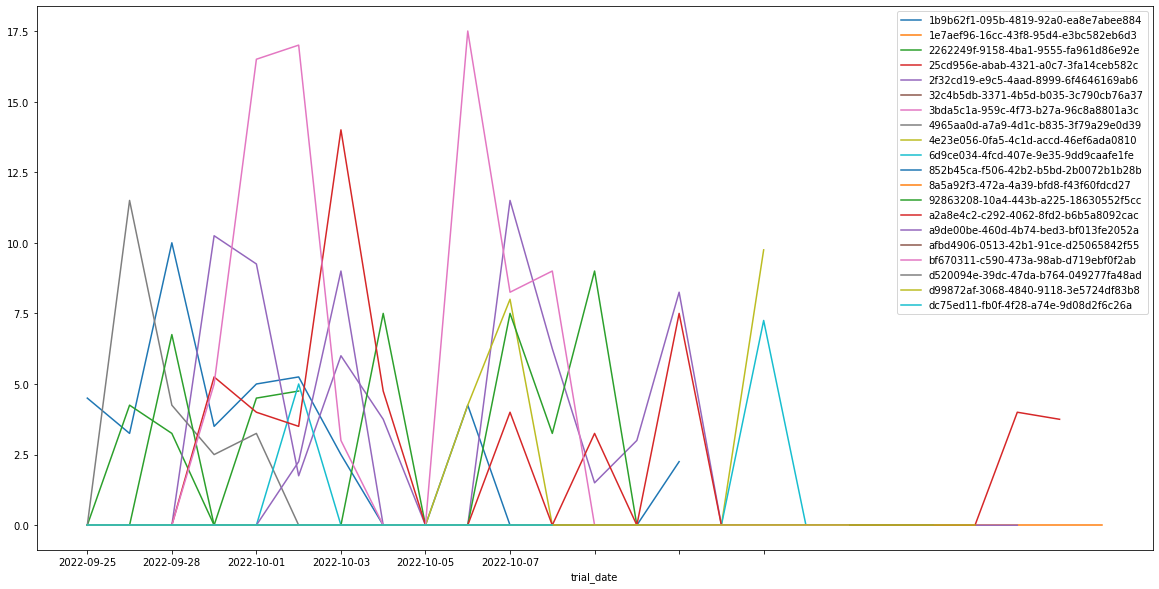

In [1135]:
x.set_index('trial_date', inplace = True)
x.groupby('ParticipantIdentifier')['time_work'].plot(legend=True, figsize=(20, 10));

### Work Distance

In [1165]:
x = df[['ParticipantIdentifier', 'visits_work_distance']].dropna().drop_duplicates(subset=['ParticipantIdentifier']).reset_index(drop=True)

In [1172]:
x = x.loc[x.visits_work_distance<100000]
x.visits_work_distance = x.visits_work_distance/1000

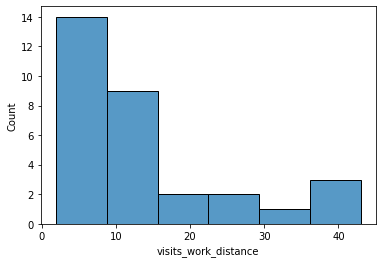

In [1174]:
sns.histplot(data = x, x = 'visits_work_distance');

---
Pretty straightforward to do calculations of un-nested keys...

- totalUnlocks
- totalUnlockDuration
- totalScreenWakes

In [ ]:
result_tuple = tuple(jsonnn_tree.execute('$..totalUnlocks')) 
totalUnlocks = sum(result_tuple)
print(f'Total unlocks = {totalUnlocks}\n{round(totalUnlocks/hours, 2)} unlocks per hour...')

Total unlocks = 127
9.07 unlocks per hour...


In [ ]:
result_tuple = tuple(jsonnn_tree.execute('$..totalUnlockDuration')) 
totalUnlockDuration = sum(result_tuple)/3600
print(f'Unlocked time = {round(totalUnlockDuration,2)} hours\n{(round(totalUnlockDuration/hours,2)) * 100}% of the time period')

Unlocked time = 5.1 hours
36.0% of the time period


In [ ]:
result_tuple = tuple(jsonnn_tree.execute('$..totalScreenWakes')) 
totalScreenWakes = sum(result_tuple)
print(f'Total Screen wakes = {totalScreenWakes}\n{round(totalScreenWakes/hours, 2)} screen wakes per hour')

Total Screen wakes = 320
22.86 screen wakes per hour
